In [38]:
import pandas as pd
import numpy as np 
import requests
import zipfile
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
## df = pd.read_csv('https://archive.ics.uci.edu/static/public/222/bank+marketing.zip',compression='zip')

# # open zipped dataset
# with zipfile.ZipFile("https://archive.ics.uci.edu/static/public/222/bank+marketing.zip") as z:
#    # open the csv file in the dataset
#    with z.open("bank.zip") as bank:
#       # read the dataset
#       train = pd.read_csv(bank)
       
#       # display dataset
#       print(train.head())


In [14]:
# # Step 1: Download the zip file from the URL
# url = "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"
# response = requests.get(url)

# # Step 2: Extract the zip file content in memory
# with zipfile.ZipFile(io.BytesIO(response.content)) as z:
#     # Step 3: Read the 'bank-full.csv' file from the zip
#     with z.open('bank/bank-full.csv') as csv_file:
#         # Step 4: Load the CSV content into a pandas DataFrame
#         df = pd.read_csv(csv_file, sep=";")

# # Step 5: Check the DataFrame content
# print(df.head())

In [16]:
df = pd.read_csv('./bank-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
# Feature Selection
df = df[['age', 'job', 'marital', 'education', 'balance', 
             'housing', 'contact', 'day', 'month', 'duration',
             'campaign', 'pdays', 'previous', 'poutcome', 'y']]

In [19]:
df.isnull().sum() #.any()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

##### No null value

In [23]:
df.shape

(45211, 15)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


##### Question 1: What is the most frequent observation (mode) for the column 'education'

In [27]:
df['education'].nunique()

4

In [28]:
unique_values = df['education'].unique()
unique_count = len(unique_values)

print(unique_values)
print(unique_count)

['tertiary' 'secondary' 'unknown' 'primary']
4


In [29]:
df['education'].mode()

0    secondary
Name: education, dtype: object

##### Question2: Correlation Matrix for the numerical features of the dataset. A correlation matrix computes the correlation coefficient between every pair of features.

* age and balance
* day and campaign
* day and pdays
* pdays and previous

In [31]:
# Select only numerical matrix
num_df = df.select_dtypes(include=['int64', 'float64'])

In [32]:
num_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [34]:
corr_matrix = num_df.corr()
print(corr_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


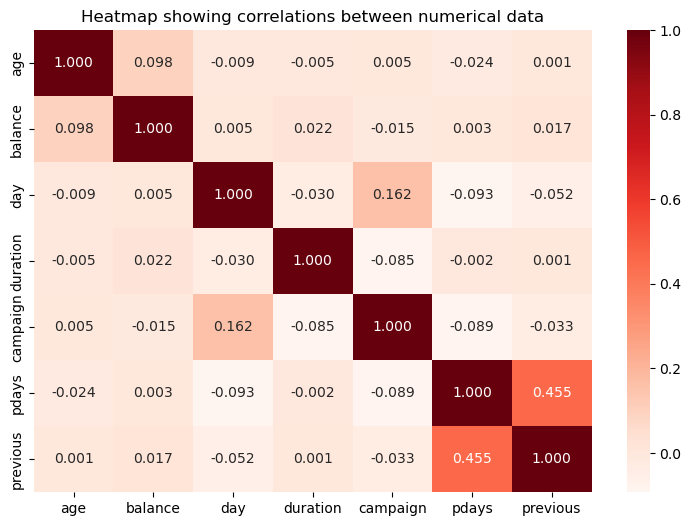

In [44]:
# Heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(num_df.corr(), cmap="Reds", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [47]:
corr_pairs = corr_matrix.unstack()

# Sort the correlation pairs and filter out self-correlations (i.e., 1.0)
sorted_corr = corr_pairs.sort_values(ascending=False)
sorted_corr = sorted_corr[sorted_corr < 1.0]

# Display the top two most correlated features
print(sorted_corr.head(2))

previous  pdays       0.45482
pdays     previous    0.45482
dtype: float64


Q2) Two Features with the Biggest Correlation  - pdays and previous

In [51]:
# Target Encoding

# Now we want to encode the y variable.
# Let's replace the values yes/no with 1/0

# Replace 'yes' with 1 and 'no' with 0 in the 'y' column
df['y'] = df['y'].replace({'yes': 1, 'no': 0})

# Verify the change
print(df['y'].head())


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


In [52]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [54]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, accuracy_score

In [55]:
# Split the Data into Train/Validation/Train Sets (60/20/20)
# To split the data, we use Scikit-learn’s train_test_split 
# function.

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

assert len(df) == (len(df_train) + len(df_val) + len(df_test))

In [56]:

# Reset_index for y_train, y_val and y_test.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [57]:

# Define y_train, y_val and y_test.
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [58]:
# Drop y from y_train, y_val and y_test.
df_train = df_train.drop('y', axis=1)
df_val = df_val.drop('y', axis=1)
df_test = df_test.drop('y', axis=1)

assert 'y' not in df_train.columns
assert 'y' not in df_val.columns
assert 'y' not in df_test.columns

# Question 3 - Variable with the biggest mutual information score with y

In [59]:
# Define cal_mi function.
def mi_scores(series):
    return mutual_info_score(series, y_train)

In [62]:
# List the categorical columns.
df_catcol = df.copy().select_dtypes(exclude=['int64', 'float64']).columns
df_catcol

Index(['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome'],
      dtype='object')

In [63]:
cat_list = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [64]:
# MI.
df_mi = df_train[cat_list].apply(mi_scores).round(2)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
month,0.03
poutcome,0.03
job,0.01
housing,0.01
contact,0.01
marital,0.00
education,0.00


## 4. Accuracy on the validation dataset

In [65]:
# Derive X_train.
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [66]:
# Fit X_train and y_train to model.
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [67]:

#X_val.
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [68]:
#y_pred.
y_pred = model.predict(X_val)

In [70]:
# accuracy.
accuracy = np.round(accuracy_score(y_val, y_pred), 2)
print(f'Accuracy on the validation dataset= {accuracy}')

Accuracy on the validation dataset= 0.9


#### Question 5: Feature with the smallest difference
* age
* balance
* marital
* previous

In [71]:
# List of features
features = df_train.columns.to_list()
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [72]:
# Feature elimination technique.
original_score = accuracy
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])
for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [73]:
scores

,eliminated_feature,accuracy,difference
0,age,0.900243,-0.000243
1,job,0.901128,-0.001128
2,marital,0.901239,-0.001239
3,education,0.901017,-0.001017
4,balance,0.900686,-0.000686
5,housing,0.901017,-0.001017
6,contact,0.900354,-0.000354
7,day,0.900133,-0.000133
8,month,0.899912,0.000088
9,duration,0.890179,0.009821


In [75]:
# Least useful feature.
min_diff = scores.difference.min()
scores[scores.difference == min_diff]

,eliminated_feature,accuracy,difference
11,pdays,0.90146,-0.00146
